
---

# ***`Skin Tumor Classification Prototype`***

---

Author : Muhammad Faizan Iqbal

Contact : faizanzafar295@gmail.com

Date : 13/03/2025


# **Introduction**

> Skin tumours are a challenging group of conditions that can be categorised into those that are commonly seen and easily recognised based on the characteristic site of presentation, size, colour, distribution and symptoms.Skin tumours are classified on 10 IMG_CLASSES.


| **Name**                                           | **Description**                                       |
|---------------------------------------------------------------|---------------------------------------------------------|
| **1. Eczema 1677**                                                | A condition causing dry, itchy, and inflamed skin.       |
| **2. Melanoma 15.75k**                                            | A serious form of skin cancer that can spread rapidly.   |
| **3. Atopic Dermatitis 1.25k**                                    | A chronic skin condition causing inflammation and itch.  |
| **4. Basal Cell Carcinoma (BCC) 3323**                            | A common, slow-growing skin cancer.                     |
| **5. Melanocytic Nevi (NV) 7970**                                 | Non-cancerous moles formed by melanocyte cells.          |
| **6. Benign Keratosis-like Lesions (BKL) 2624**                   | Non-cancerous skin growths resembling keratoses.         |
| **7. Psoriasis pictures Lichen Planus and related diseases 2k**   | Chronic skin conditions causing scaly or inflamed patches.|
| **8. Seborrheic Keratoses and other Benign Tumors 1.8k**          | Non-cancerous skin tumors with a waxy appearance.        |
| **9. Tinea Ringworm Candidiasis and other Fungal Infections 1.7k**| Fungal infections causing red, scaly, and itchy skin.   |
| **10. Warts Molluscum and other Viral Infections 2103**            | Viral skin growths like warts and molluscum contagiosum. |


# **Table of Contents**

> * Download the Dataset
> * Load the Dataset into Jypyter Notebook
> * Identify and list the Data Classess
> * Perform Data Augmentation
> * Prepare Data for training the model  
> * Perform the Data spliting (traning and testing)

# **Data processing**

![](https://www.dataentryexport.com/blog/wp-content/uploads/2016/11/Change-your-business-with-organized-Data-Processing-Services.jpg)

In [1]:
!pip install split_folders -q
!pip install gdown -q

### **0. Calling all Required Libiraries**

In [2]:
import os
import cv2
import random
import kagglehub
import splitfolders
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory

### **1. Download the Dataset**

In [3]:
import gdown

file_id = "1t5vOdQoxNDRSkQi9e7MMK9cPI8J-8C2F"
download_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(download_url, output="data.zip", quiet=False)


print('Data source import complete.')

Downloading...
From (original): https://drive.google.com/uc?id=1t5vOdQoxNDRSkQi9e7MMK9cPI8J-8C2F
From (redirected): https://drive.google.com/uc?id=1t5vOdQoxNDRSkQi9e7MMK9cPI8J-8C2F&confirm=t&uuid=ecbc6b48-99d4-40fb-b136-ed7e545e43c1
To: /content/data.zip
100%|██████████| 1.08G/1.08G [00:18<00:00, 58.6MB/s]

Data source import complete.


In [4]:
import zipfile
import os

# Define the zip file path and extraction path
zip_file_path = "data.zip"
extract_to = "./extracted_data"  # You can change this directory name

# Create the directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Open and extract
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Data extracted to {extract_to}")


Data extracted to ./extracted_data


### **2. Load the Dataset into Kaggle Jypyter Notebook**

In [5]:
!ls "/content/extracted_data/archive"

IMG_CLASSES


### **3. Identify the classes and list them all**

In [6]:
!ls "/content/extracted_data/archive/IMG_CLASSES"

'10. Warts Molluscum and other Viral Infections - 2103'
'1. Eczema 1677'
'2. Melanoma 15.75k'
'3. Atopic Dermatitis - 1.25k'
'4. Basal Cell Carcinoma (BCC) 3323'
'5. Melanocytic Nevi (NV) - 7970'
'6. Benign Keratosis-like Lesions (BKL) 2624'
'7. Psoriasis pictures Lichen Planus and related diseases - 2k'
'8. Seborrheic Keratoses and other Benign Tumors - 1.8k'
'9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k'


In [7]:
# Define the original and new names
base_path = "/content/extracted_data/archive/IMG_CLASSES"

rename_map = {
    "1. Eczema 1677": "Eczema",
    "10. Warts Molluscum and other Viral Infections - 2103": "Warts & Viral Infections",
    "2. Melanoma 15.75k": "Melanoma",
    "3. Atopic Dermatitis - 1.25k": "Atopic Dermatitis",
    "4. Basal Cell Carcinoma (BCC) 3323": "Basal Cell Carcinoma (BCC)",
    "5. Melanocytic Nevi (NV) - 7970": "Melanocytic Nevi (NV)",
    "6. Benign Keratosis-like Lesions (BKL) 2624": "Benign Keratosis (BKL)",
    "7. Psoriasis pictures Lichen Planus and related diseases - 2k": "Psoriasis & Lichen Planus",
    "8. Seborrheic Keratoses and other Benign Tumors - 1.8k": "Seborrheic Keratoses",
    "9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k": "Fungal Infections"
}

# Rename the folders
for old_name, new_name in rename_map.items():
    old_path = os.path.join(base_path, old_name)
    new_path = os.path.join(base_path, new_name)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Renamed: {old_name} --> {new_name}")
    else:
        print(f"Not found: {old_name}")


Renamed: 1. Eczema 1677 --> Eczema
Renamed: 10. Warts Molluscum and other Viral Infections - 2103 --> Warts & Viral Infections
Renamed: 2. Melanoma 15.75k --> Melanoma
Renamed: 3. Atopic Dermatitis - 1.25k --> Atopic Dermatitis
Renamed: 4. Basal Cell Carcinoma (BCC) 3323 --> Basal Cell Carcinoma (BCC)
Renamed: 5. Melanocytic Nevi (NV) - 7970 --> Melanocytic Nevi (NV)
Renamed: 6. Benign Keratosis-like Lesions (BKL) 2624 --> Benign Keratosis (BKL)
Renamed: 7. Psoriasis pictures Lichen Planus and related diseases - 2k --> Psoriasis & Lichen Planus
Renamed: 8. Seborrheic Keratoses and other Benign Tumors - 1.8k --> Seborrheic Keratoses
Renamed: 9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k --> Fungal Infections


In [8]:
!ls "/content/extracted_data/archive/IMG_CLASSES"

'Atopic Dermatitis'	      'Melanocytic Nevi (NV)'
'Basal Cell Carcinoma (BCC)'   Melanoma
'Benign Keratosis (BKL)'      'Psoriasis & Lichen Planus'
 Eczema			      'Seborrheic Keratoses'
'Fungal Infections'	      'Warts & Viral Infections'


In [9]:
# Create the output directories, with the option to ignore if they already exist
os.makedirs('output', exist_ok=True)
os.makedirs('output/train', exist_ok=True)
os.makedirs('output/val', exist_ok=True)
os.makedirs('output/test', exist_ok=True)

loc = "/content/extracted_data/archive/IMG_CLASSES"

# Split the dataset located at 'loc' into training (80%), validation (10%), and test (10%) sets,
# and save the output in the specified 'output' directory.
splitfolders.ratio(loc, output="output", ratio=(0.80, 0.1, 0.1))

Copying files: 6448 files [00:05, 1286.41 files/s]


In [10]:
# define a function to display the random image from each category
def random_image(val_dir,val_class):
    folder = val_dir +val_class
    random_image = random.sample(os.listdir(folder),1)
    img = mping.imread(folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(val_class)
    return img

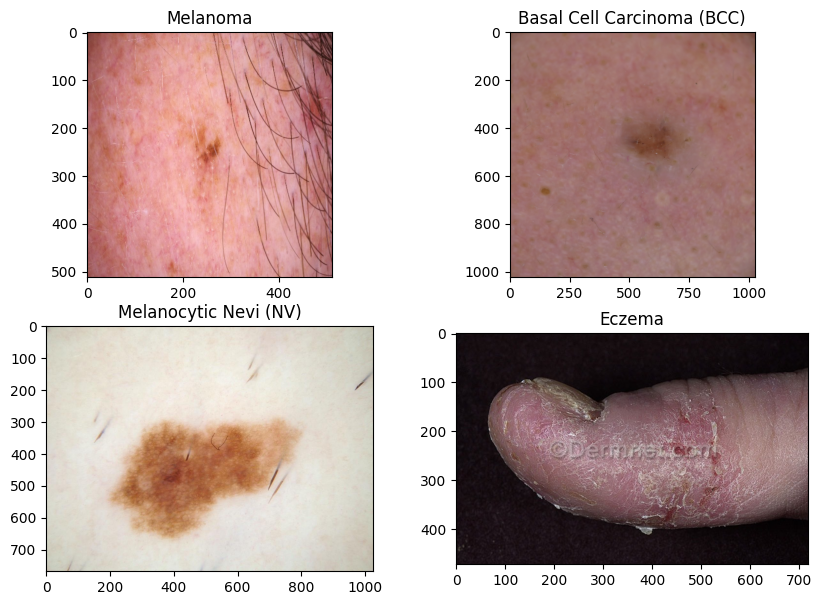

In [11]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "Melanoma")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "Basal Cell Carcinoma (BCC)")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "Melanocytic Nevi (NV)")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./output/val/",val_class = "Eczema")


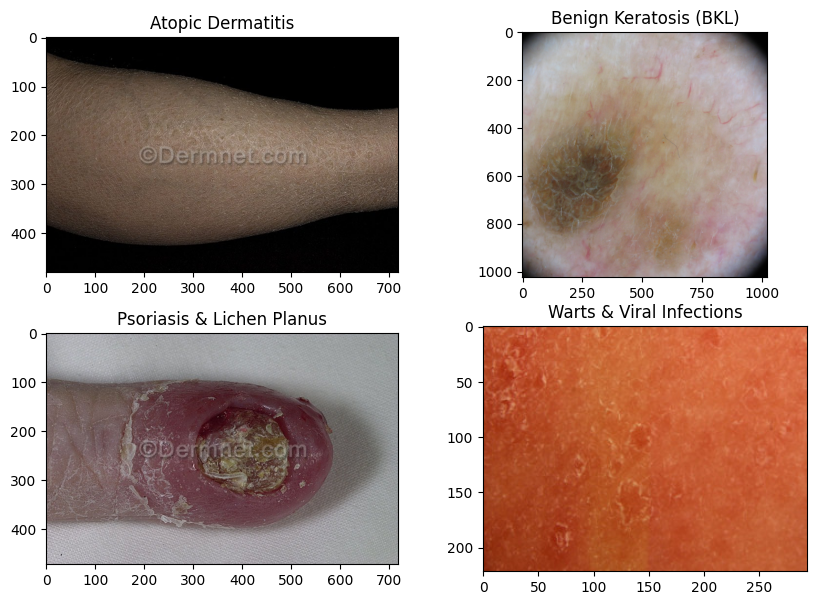

In [12]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "Atopic Dermatitis")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "Benign Keratosis (BKL)")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "Psoriasis & Lichen Planus")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./output/val/",val_class = "Warts & Viral Infections")

# **Modeling**

![](https://pyimagesearch.com/wp-content/uploads/2019/10/keras_vs_tfdotkeras_header.png)

In [13]:
train_dir = "./output/train"
test_dir =  "./output/test"
val_dir = "./output/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = True,seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)

Found 5155 files belonging to 10 classes.
Found 654 files belonging to 10 classes.
Found 639 files belonging to 10 classes.


In [15]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

# Step 1: Extract all labels from train_data
all_labels = []  # Initialize an empty list to store all labels

# Iterate over each entry in train_data
for _, labels in train_data:
    # Extend the all_labels list by appending the labels (converted to numpy array)
    # Convert the labels to NumPy array and then flatten it to a 1D array
    all_labels.extend(labels.numpy().argmax(axis=1)) # The key change is on this line

# Step 2: Compute class weights
class_labels = np.unique(all_labels)  # Get unique class labels from all_labels

# Calculate the class weights using balanced method
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=all_labels)

# Create a dictionary mapping class labels to their corresponding weights
class_weights = dict(zip(class_labels, class_weights))

# Print the computed class weights
print("Class weights:", class_weights)

Class weights: {np.int64(0): np.float64(0.8980836236933798), np.int64(1): np.float64(1.0477642276422765), np.int64(2): np.float64(0.9913461538461539), np.int64(3): np.float64(1.1280087527352298), np.int64(4): np.float64(1.4399441340782122), np.int64(5): np.float64(0.9156305506216696), np.int64(6): np.float64(0.8620401337792643), np.int64(7): np.float64(0.9932562620423893), np.int64(8): np.float64(1.174259681093394), np.int64(9): np.float64(0.8118110236220473)}


# EarlyStopping
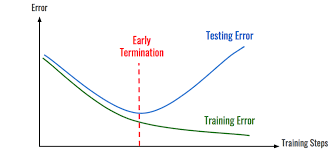

# ReduceLROnPlateau
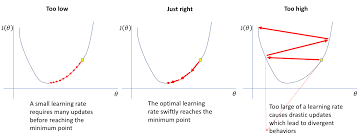

In [16]:
# Create an EarlyStopping callback to stop training when the validation loss has not improved
# for a specified number of epochs (patience). It monitors 'val_loss' and requires a minimum
# change (min_delta) of 0.0001 to consider an improvement.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,
                                             min_delta=0.0001)

# Create a ReduceLROnPlateau callback to reduce the learning rate when the validation loss
# has stopped improving. It monitors 'val_loss', reduces the learning rate by a factor of
# 0.2 if no improvement is observed for 'patience' number of epochs, and sets a minimum
# learning rate (min_lr) of 1e-7.
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                patience=4, min_lr=1e-7)

# EfficientNetB7

> EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients

![](https://www.researchgate.net/publication/358902226/figure/fig6/AS:1132398989328389@1646996366464/EfficientNetB7-architecture.ppm)



In [17]:
model = tf.keras.applications.EfficientNetB7(include_top = False)
model.trainable = False
#To "freeze" a layer means to exclude it from training, i.e. its weights will never be updated.

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# **Data augmentation**

> Data augmentation is used here to prevent overfitting, we can experiment without data augmentation and check whether the model overfits or not,but since we are using a transfer learning Architecture such as EfficientNet,its best to include data augmentation since the probability of our model overfitting is very high.
>
> TensorFlow provides us with two methods we can use to apply data augmentation to our tf.data pipelines:
>
> Use the Sequential class and the preprocessing module to build a series of data augmentation operations, similar to Keras’ ImageDataGenerator class
> Apply tf.image functions to manually create the data augmentation routine
You can also use Keras preprocessing layers for data augmentation, such as tf.keras.layers.RandomFlip and tf.keras.layers.RandomRotation .

![](https://www.baeldung.com/wp-content/uploads/sites/4/2022/08/AugmentData.png)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_aug = keras.Sequential([
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal_and_vertical")
], name="data_augmentation_layer")

### **Prepare the images and labels for training the model**

- Ensure that the images are in the correct format (e.g., RGB or grayscale) and shape.


In [19]:
# Define the input layer with a shape of 224x224 pixels and 3 color channels (RGB)
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")

# Apply data augmentation to the input images
x = data_aug(inputs)

# Pass the augmented data through a predefined model (e.g., a backbone CNN)
x = model(x)

# Apply Global Average Pooling to reduce the spatial dimensions of the feature maps
x = layers.GlobalAvgPool2D(name="pooling_layer")(x)

# Add a fully connected (dense) layer with 32 units and ReLU activation
# He normal initializer is used for weight initialization
x = layers.Dense(32, activation="relu", kernel_initializer=tf.keras.initializers.he_normal())(x)

# Add another fully connected layer with 10 units (for 10 output classes)
x = layers.Dense(10)(x)

# Apply softmax activation to generate probabilities for the output classes
outputs = layers.Activation("softmax", dtype=tf.float32)(x)

# Create a Keras model with the specified inputs and outputs
model = tf.keras.Model(inputs, outputs)

# Print a summary of the model architecture
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb7 (Functional)     │ (None, None, None,     │    64,097,687 │
│                                 │ 2560)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 2560)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        81,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,179,969 (244.83 MB)

 Trainable params: 82,282 (321.41 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

Once the model is created, you can config the model with
* losses and metrics with model.compile(),
* train the model with model.fit(),
* or use the model to do prediction with model.predict().

In [20]:
# Compile the model with the specified loss function, optimizer, and evaluation metrics
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Use categorical crossentropy as the loss function for multi-class classification
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),             # Use the Adam optimizer, which is popular for training deep learning models
    metrics=["accuracy"]                               # Track accuracy as a metric during training and evaluation
)

### **Train the model using the training dataset for a specified number of epochs**

In [21]:
import time

# Start the timer
start_time = time.time()

# Train the model while validating on the validation dataset
history_1 = model.fit(
    train_data,               # Training data used for model training
    epochs=100,                 # Number of epochs
    validation_data=val_data, # Validation data for evaluation
    callbacks=[early_stop,    # Early stopping callback
               reduce_lr],     # Learning rate reduction callback
    class_weight=class_weights,
)

# Stop the timer
end_time = time.time()

# Calculate and display the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for training: {elapsed_time:.2f} seconds")

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 148s 658ms/step - accuracy: 0.2455 - loss: 2.1370 - val_accuracy: 0.4335 - val_loss: 1.6597 - learning_rate: 1.0000e-04
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 116s 521ms/step - accuracy: 0.4465 - loss: 1.6438 - val_accuracy: 0.4930 - val_loss: 1.4190 - learning_rate: 1.0000e-04
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 92s 564ms/step - accuracy: 0.5010 - loss: 1.4514 - val_accuracy: 0.5352 - val_loss: 1.3146 - learning_rate: 1.0000e-04
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 139s 549ms/step - accuracy: 0.5175 - loss: 1.3540 - val_accuracy: 0.5290 - val_loss: 1.2487 - learning_rate: 1.0000e-04
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 138s 521ms/step - accuracy: 0.5294 - loss: 1.2843 - val_accuracy: 0.5383 - val_loss: 1.2042 - learning_rate: 1.0000e-04
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 88s 546ms/step - accuracy: 0.5612 - loss: 1.2323 - val_accuracy: 0.5493 - val_loss: 1.1740 - learning_rate: 1.0000e-04
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━

In [22]:
print("Testing Accuracy",model.evaluate(test_data))

21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 452ms/step - accuracy: 0.6484 - loss: 0.9424
Testing Accuracy [0.9485402703285217, 0.6360856294631958]


In [23]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Model Accuracy Over Epochs', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    plt.title('Model Loss Over Epochs', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


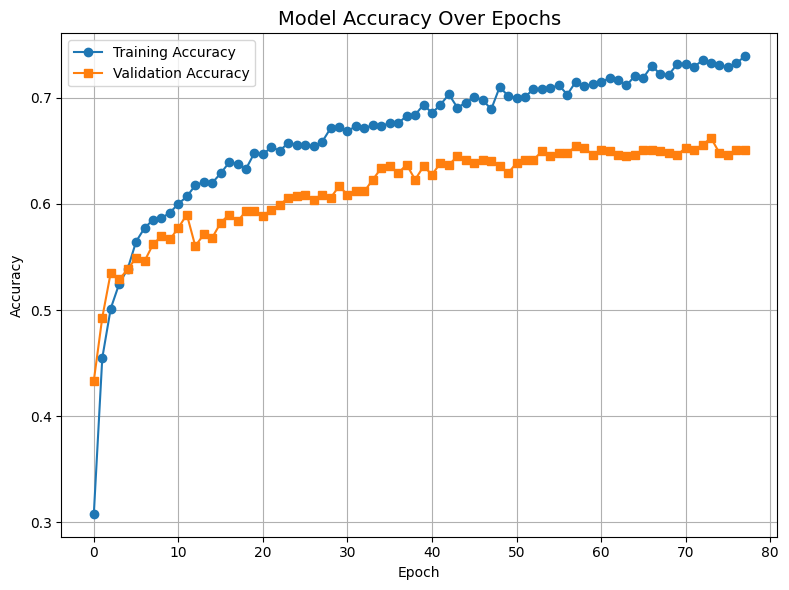

In [24]:
plot_accuracy(history_1)

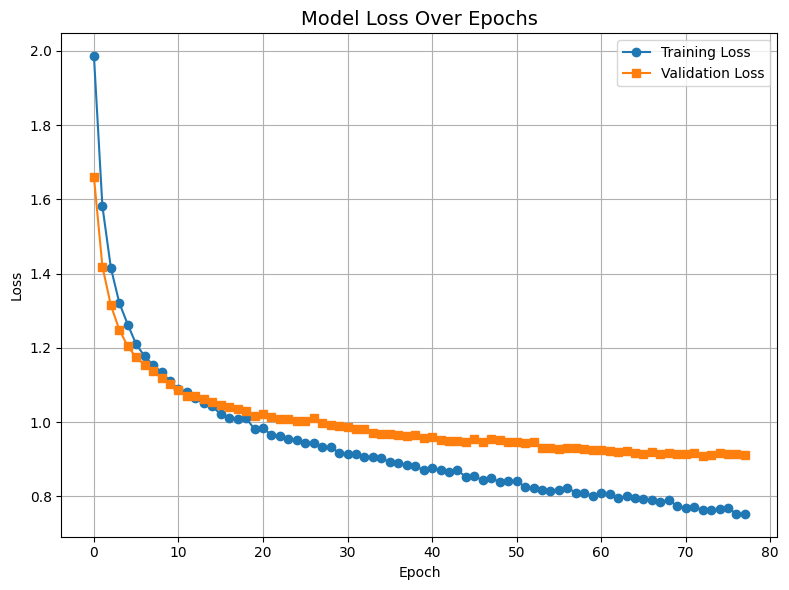

In [25]:
plot_loss(history_1)

In [26]:
def plot_model_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], 'bo-', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], 'go-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy', fontsize=16)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

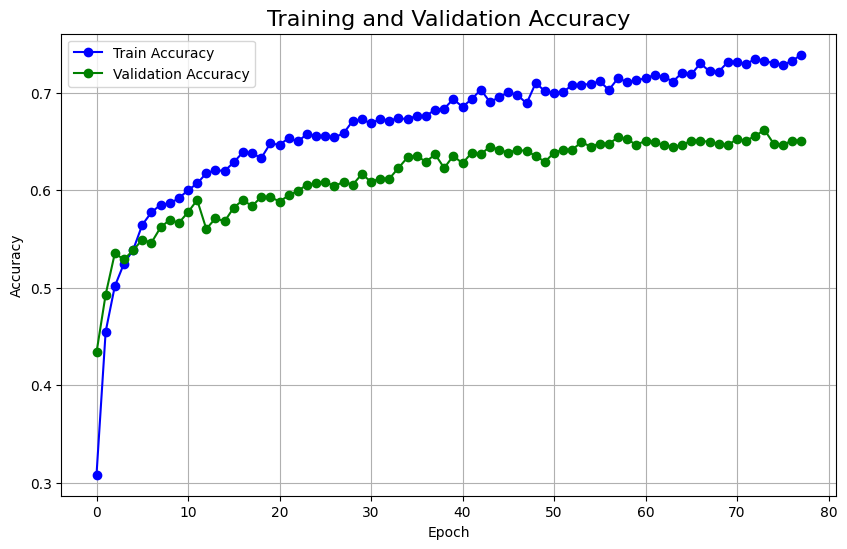

In [27]:
plot_model_accuracy(history_1)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, X_test, y_test, class_names):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))


In [29]:
import numpy as np

# Extracting all batches from the tf.data.Dataset
X_test, y_test = [], []

for images, labels in test_data:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

print("Test set shape:", X_test.shape, y_test.shape)


Test set shape: (654, 224, 224, 3) (654, 10)


21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 828ms/step


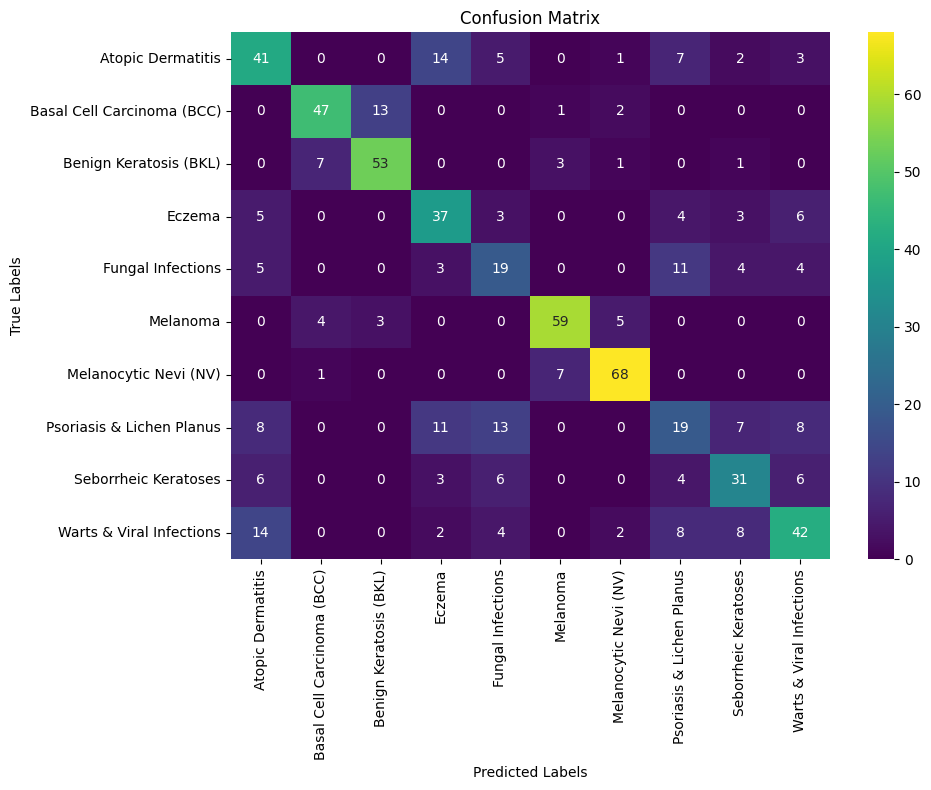


Classification Report:
                            precision    recall  f1-score   support

         Atopic Dermatitis       0.52      0.56      0.54        73
Basal Cell Carcinoma (BCC)       0.80      0.75      0.77        63
    Benign Keratosis (BKL)       0.77      0.82      0.79        65
                    Eczema       0.53      0.64      0.58        58
         Fungal Infections       0.38      0.41      0.40        46
                  Melanoma       0.84      0.83      0.84        71
     Melanocytic Nevi (NV)       0.86      0.89      0.88        76
 Psoriasis & Lichen Planus       0.36      0.29      0.32        66
      Seborrheic Keratoses       0.55      0.55      0.55        56
  Warts & Viral Infections       0.61      0.53      0.56        80

                  accuracy                           0.64       654
                 macro avg       0.62      0.63      0.62       654
              weighted avg       0.63      0.64      0.63       654



In [31]:
# Evaluate model
# Define the class names
class_names = ['Atopic Dermatitis', 'Basal Cell Carcinoma (BCC)', 'Benign Keratosis (BKL)', 'Eczema', 'Fungal Infections', 'Melanoma', 'Melanocytic Nevi (NV)', 'Psoriasis & Lichen Planus', 'Seborrheic Keratoses', 'Warts & Viral Infections']

# Call the plotting function
plot_confusion_matrix(model, X_test, y_test, class_names)

In [32]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def predict_and_display(model, img_path, class_names, target_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Model prediction
    prediction = model.predict(img_array)[0]
    top_class = np.argmax(prediction)
    confidence = prediction[top_class]

    # Display image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

    # Visually appealing label
    title_text = f"Prediction: {class_names[top_class]}\nConfidence Score: {confidence * 100:.2f} %"
    plt.title(title_text, fontsize=14, color='darkgreen', loc='left', pad=20)
    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


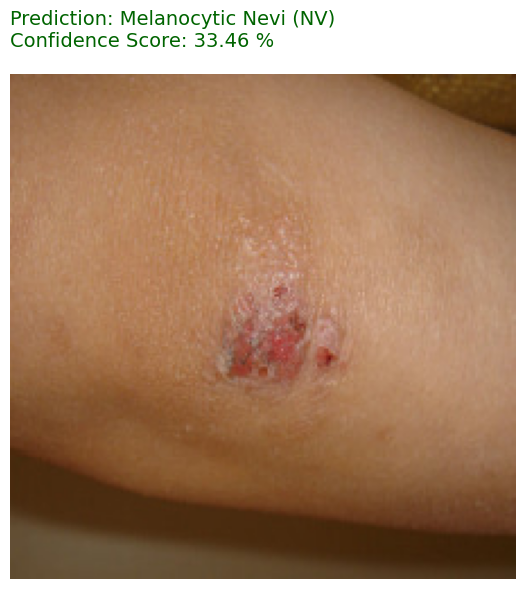

In [33]:
# Predict on an image
predict_and_display(model, '/content/extracted_data/archive/IMG_CLASSES/Eczema/0_4.jpg', class_names)


# Save Model

In [34]:
model.save('/content/my_model.keras')

In [37]:
# Mount Google Drive to access it
from google.colab import drive
drive.mount('/content/drive')

# Save the model to your Google Drive
model.save('/content/drive/MyDrive/Skin Cancer Detection Model/my_model.keras')

Mounted at /content/drive


---